In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", 200)

BASE_DIR = Path.cwd().parent   # si tu lances bien le notebook depuis le dossier Notebooks

# Chemin vers DATA/annonceclean.csv
csv_path = BASE_DIR / "DATA" / "df_analyseVF4.csv"

df = pd.read_csv(csv_path)
print("Shape initiale :", df.shape)
df.head()

df.shape

Shape initiale : (8274, 11)


(8274, 11)

In [3]:
df.head()

,type_bien,sous_type,Ville,Arrondissement,Code_postal,departement_nom,departement_code,prix,surface,prix_m2,pieces
0,Appartement,Appartement,Aix-en-Provence,NaN,13100,Bouches-du-Rhône,13,983500,105.0,9366.666667,4.0
1,Appartement,Appartement,Aix-en-Provence,NaN,13100,Bouches-du-Rhône,13,950500,128.0,7425.781250,5.0
2,Appartement,Appartement,Marseille,8.0,13008,Bouches-du-Rhône,13,942100,108.0,8723.148148,4.0
3,Appartement,Appartement,Aix-en-Provence,NaN,13090,Bouches-du-Rhône,13,890000,102.0,8725.490196,4.0
4,Appartement,Appartement,Aix-en-Provence,NaN,13080,Bouches-du-Rhône,13,882000,110.4,7989.130435,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8274 entries, 0 to 8273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type_bien         8274 non-null   object 
 1   sous_type         8274 non-null   object 
 2   Ville             8274 non-null   object 
 3   Arrondissement    219 non-null    float64
 4   Code_postal       8274 non-null   int64  
 5   departement_nom   8274 non-null   object 
 6   departement_code  8274 non-null   object 
 7   prix              8274 non-null   int64  
 8   surface           8274 non-null   float64
 9   prix_m2           8274 non-null   float64
 10  pieces            8265 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 711.2+ KB


In [5]:
df.isna().sum()

type_bien              0
sous_type              0
Ville                  0
Arrondissement      8055
Code_postal            0
departement_nom        0
departement_code       0
prix                   0
surface                0
prix_m2                0
pieces                 9
dtype: int64

In [6]:
df[["prix", "surface", "prix_m2", "pieces"]].describe()

,prix,surface,prix_m2,pieces
count,8.274000e+03,8274.000000,8274.000000,8265.000000
mean,3.055161e+05,95.599142,3671.798877,3.986328
std,2.670709e+05,61.181092,2329.847133,2.009942
min,2.100000e+04,10.500000,110.701107,1.000000
25%,1.699992e+05,60.000000,1986.438284,3.000000
50%,2.450000e+05,80.000000,3458.578431,4.000000
75%,3.600000e+05,114.000000,4677.035647,5.000000
max,5.400000e+06,495.000000,27953.216374,18.000000


In [7]:
df["type_bien"].value_counts()

type_bien
Appartement    5177
Maison         3064
Duplex           33
Name: count, dtype: int64

In [8]:
df["sous_type"].value_counts()

sous_type
Appartement    5051
Maison         3039
Duplex          159
Pavillon         24
Villa             1
Name: count, dtype: int64

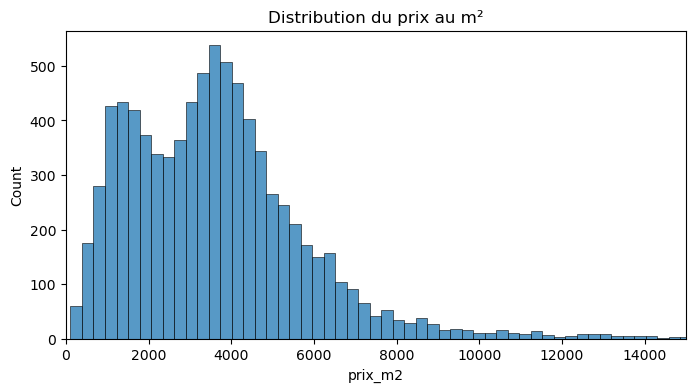

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df["prix_m2"], bins=100)
plt.xlim(0, 15000)
plt.title("Distribution du prix au m²")
plt.show()

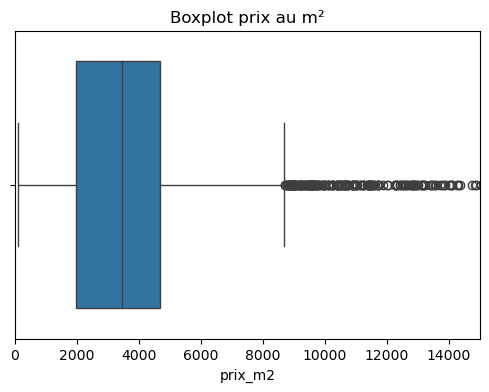

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["prix_m2"])
plt.xlim(0, 15000)
plt.title("Boxplot prix au m²")
plt.show()

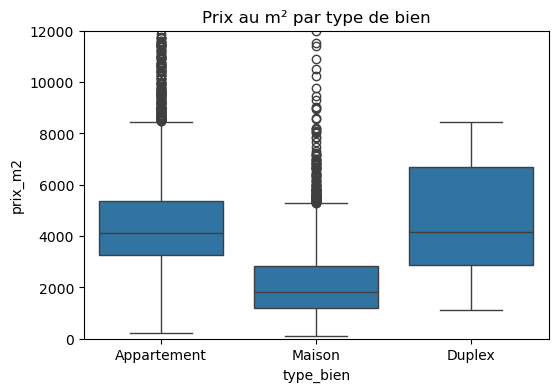

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="type_bien",
    y="prix_m2"
)
plt.ylim(0, 12000)
plt.title("Prix au m² par type de bien")
plt.show()

In [12]:
df["Ville"].value_counts().head(15)

Ville
Paris               114
Reims                80
Strasbourg           78
Toulouse             74
Angers               72
Bordeaux             60
Marseille            59
Saint-Denis          58
Dijon                58
Tours                55
Amiens               54
Clermont-Ferrand     54
Aix-en-Provence      51
Montpellier          50
Le Havre             49
Name: count, dtype: int64

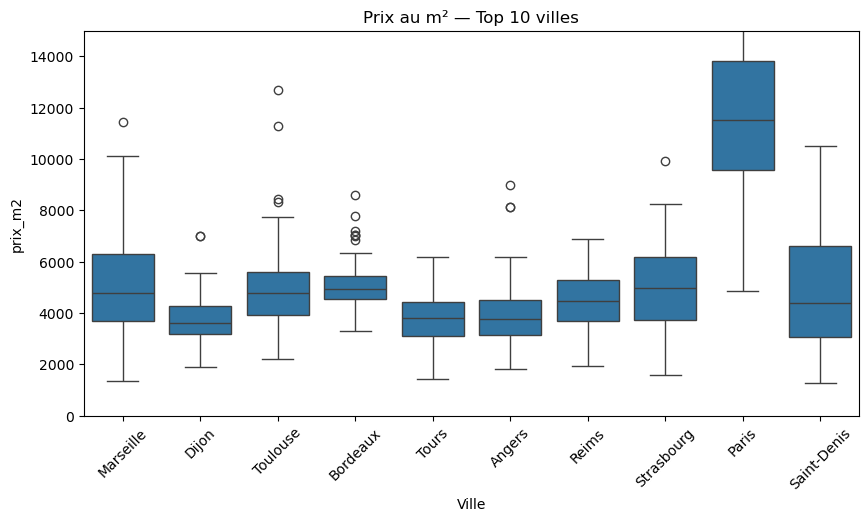

In [13]:
top_villes = df["Ville"].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.boxplot(
    data=df[df["Ville"].isin(top_villes)],
    x="Ville",
    y="prix_m2"
)
plt.xticks(rotation=45)
plt.ylim(0, 15000)
plt.title("Prix au m² — Top 10 villes")
plt.show()

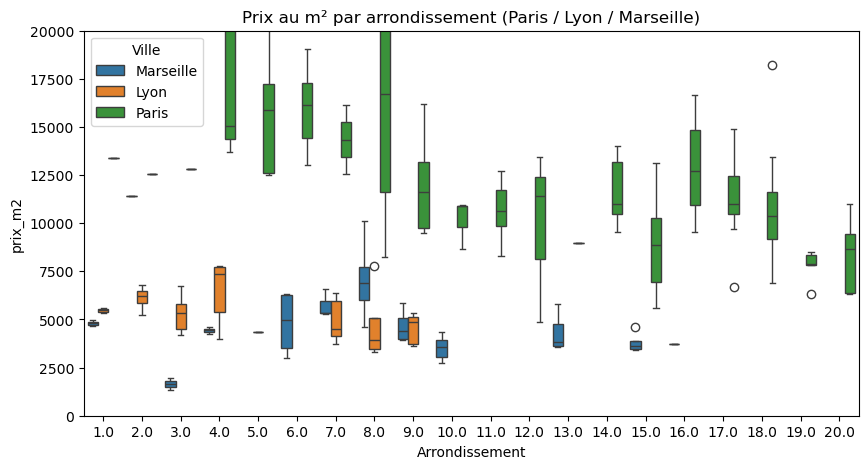

In [14]:
df_big = df[df["Ville"].isin(["Paris", "Lyon", "Marseille"])]

plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_big,
    x="Arrondissement",
    y="prix_m2",
    hue="Ville"
)
plt.ylim(0, 20000)
plt.title("Prix au m² par arrondissement (Paris / Lyon / Marseille)")
plt.show()

In [15]:
df[["prix", "surface", "prix_m2", "pieces"]].corr()

,prix,surface,prix_m2,pieces
prix,1.000000,0.367808,0.608027,0.287274
surface,0.367808,1.000000,-0.319274,0.864131
prix_m2,0.608027,-0.319274,1.000000,-0.343468
pieces,0.287274,0.864131,-0.343468,1.000000
